In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
account_info = pd.read_excel('/kaggle/input/churn-dataset/Customer_account_info.xlsx')
demographics = pd.read_excel('/kaggle/input/churn-dataset/Customer_demographics.xlsx')
churn = pd.read_csv('/kaggle/input/churn-dataset/Customer_Churn.csv')
customer_services = pd.read_excel('/kaggle/input/churn-dataset/Customer_services.xlsx')

In [3]:
account_info.columns

Index(['customerID', 'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [4]:
demographics.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'], dtype='object')

In [5]:
customer_services.columns

Index(['customerID', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies'],
      dtype='object')

In [6]:
churn.columns

Index(['customerID', 'Churn'], dtype='object')

In [7]:
merged_data = pd.merge(account_info , demographics, on="customerID")
merged_data1 = pd.merge(merged_data , customer_services, on="customerID")
final_merged_data = pd.merge(merged_data1 , churn, on="customerID")

In [8]:
final_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34413 entries, 0 to 34412
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        34413 non-null  object 
 1   tenure            34397 non-null  float64
 2   Contract          34406 non-null  object 
 3   PaperlessBilling  34380 non-null  object 
 4   PaymentMethod     34364 non-null  object 
 5   MonthlyCharges    34400 non-null  float64
 6   TotalCharges      34403 non-null  object 
 7   gender            34408 non-null  object 
 8   SeniorCitizen     34371 non-null  float64
 9   Partner           34413 non-null  object 
 10  Dependents        34413 non-null  object 
 11  PhoneService      34401 non-null  object 
 12  MultipleLines     34413 non-null  object 
 13  InternetService   34413 non-null  object 
 14  OnlineSecurity    34376 non-null  object 
 15  OnlineBackup      34413 non-null  object 
 16  DeviceProtection  34413 non-null  object

In [9]:
# Calculate the number of null values in each column
null_counts = final_merged_data.isnull().sum()

# Calculate the percentage of null values in each column
null_percentages = (null_counts / len(final_merged_data)) * 100

# Create a DataFrame to store the results
null_info = pd.DataFrame({
    "Column": null_counts.index,
    "Null Count": null_counts.values,
    "Null Percentage": null_percentages.values
})

# Filter columns with null values
columns_with_null = null_info[null_info["Null Count"] > 0]

# Print columns with null values and their information
for index, row in columns_with_null.iterrows():
    print(f"Column: {row['Column']}")
    print(f"Null Count: {row['Null Count']}")
    print(f"Null Percentage: {row['Null Percentage']:.2f}%")
    print("=" * 20)

Column: tenure
Null Count: 16
Null Percentage: 0.05%
Column: Contract
Null Count: 7
Null Percentage: 0.02%
Column: PaperlessBilling
Null Count: 33
Null Percentage: 0.10%
Column: PaymentMethod
Null Count: 49
Null Percentage: 0.14%
Column: MonthlyCharges
Null Count: 13
Null Percentage: 0.04%
Column: TotalCharges
Null Count: 10
Null Percentage: 0.03%
Column: gender
Null Count: 5
Null Percentage: 0.01%
Column: SeniorCitizen
Null Count: 42
Null Percentage: 0.12%
Column: PhoneService
Null Count: 12
Null Percentage: 0.03%
Column: OnlineSecurity
Null Count: 37
Null Percentage: 0.11%
Column: TechSupport
Null Count: 35
Null Percentage: 0.10%


In [10]:
print(tabulate(columns_with_null, headers='keys', tablefmt='psql'))

+----+------------------+--------------+-------------------+
|    | Column           |   Null Count |   Null Percentage |
|----+------------------+--------------+-------------------|
|  1 | tenure           |           16 |         0.0464941 |
|  2 | Contract         |            7 |         0.0203412 |
|  3 | PaperlessBilling |           33 |         0.095894  |
|  4 | PaymentMethod    |           49 |         0.142388  |
|  5 | MonthlyCharges   |           13 |         0.0377764 |
|  6 | TotalCharges     |           10 |         0.0290588 |
|  7 | gender           |            5 |         0.0145294 |
|  8 | SeniorCitizen    |           42 |         0.122047  |
| 11 | PhoneService     |           12 |         0.0348705 |
| 14 | OnlineSecurity   |           37 |         0.107518  |
| 17 | TechSupport      |           35 |         0.101706  |
+----+------------------+--------------+-------------------+


# We can see that PaymentMethod,SeniorCitizen,OnlineSecurity and TechSupport have Comparitively Higher Number of Null Values

In [11]:
final_merged_data['PaymentMethod'].value_counts()

Mailed check                 10643
Electronic check              9566
Bank transfer (automatic)     8656
Credit card (automatic)       5499
Name: PaymentMethod, dtype: int64

In [12]:
final_merged_data['OnlineSecurity'].value_counts()

No                     16890
Yes                    12216
No internet service     5270
Name: OnlineSecurity, dtype: int64

In [13]:
final_merged_data['TechSupport'].value_counts()

No                     16860
Yes                    12341
No internet service     5177
Name: TechSupport, dtype: int64

In [14]:
# Impute categorical columns with the most frequent value
columns_to_impute = ["PaymentMethod", "OnlineSecurity", "TechSupport","SeniorCitizen"]
for col in columns_to_impute:
    most_frequent_value = final_merged_data[col].mode()[0]
    final_merged_data[col].fillna(most_frequent_value, inplace=True)

# Calculate the number of null values in each column after imputation
null_counts_after_imputation = final_merged_data.isnull().sum()

# Create a DataFrame to store the results after imputation
null_info_after_imputation = pd.DataFrame({
    "Column": null_counts_after_imputation.index,
    "Null Count": null_counts_after_imputation.values
})

# Print columns with remaining null values and their information as a table
columns_with_null_after_imputation = null_info_after_imputation[null_info_after_imputation["Null Count"] > 0]
print(tabulate(columns_with_null_after_imputation, headers='keys', tablefmt='psql'))

+----+------------------+--------------+
|    | Column           |   Null Count |
|----+------------------+--------------|
|  1 | tenure           |           16 |
|  2 | Contract         |            7 |
|  3 | PaperlessBilling |           33 |
|  5 | MonthlyCharges   |           13 |
|  6 | TotalCharges     |           10 |
|  7 | gender           |            5 |
| 11 | PhoneService     |           12 |
+----+------------------+--------------+


# Let us do a similar imputation on other columns as well.For TotalCharges we fill null values with mean,for other columns if null percentage is less than 5% then drop those rows,if more then fill those values with mode of that column.

In [15]:
type(final_merged_data["TotalCharges"][272])

float

In [16]:
list1 = []
list2 = list(final_merged_data["TotalCharges"])
for val in list2:
    if type(val) == float:
        list1.append(float(val))
mean_total_charges = sum(list1)/len(list1)
final_merged_data["TotalCharges"].fillna(mean_total_charges, inplace=True)

In [17]:
# Calculate the percentage of null values in each column
null_percentage = (final_merged_data.isnull().sum() / len(final_merged_data)) * 100

# Columns to drop rows with null values if percentage is less than 0.05%
columns_to_drop = null_percentage[null_percentage <= 0.05].index
final_merged_data.dropna(subset=columns_to_drop, inplace=True)

# Columns to fill with mode if null percentage is more than 5%
columns_to_fill_with_mode = null_percentage[null_percentage > 0.05].index
for col in columns_to_fill_with_mode:
    mode_value = final_merged_data[col].mode()[0]
    final_merged_data[col].fillna(mode_value, inplace=True)

In [18]:
len(list(final_merged_data.columns))

21

In [19]:
# Calculate the number of null values in each column after imputation
null_counts_after_imputation = final_merged_data.isnull().sum()

# Create a DataFrame to store the results after imputation
null_info_after_imputation = pd.DataFrame({
    "Column": null_counts_after_imputation.index,
    "Null Count": null_counts_after_imputation.values
})

# Print columns with remaining null values and their information as a table
columns_with_null_after_imputation = null_info_after_imputation[null_info_after_imputation["Null Count"] > 0]
print(tabulate(columns_with_null_after_imputation, headers='keys', tablefmt='psql'))

+----------+--------------+
| Column   | Null Count   |
|----------+--------------|
+----------+--------------+


# Statistics

In [20]:
final_merged_data.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,34353.000000,34353.000000,34353.000000
mean,32.917067,65.052501,0.178995
std,21.393737,27.493138,0.383353
min,0.000000,18.250000,0.000000
25%,16.000000,44.304684,0.000000
50%,32.000000,64.884369,0.000000
75%,49.000000,84.932072,0.000000
max,72.000000,118.750000,1.000000


# Add Boxplots to Find Outliers

# Data Visualization

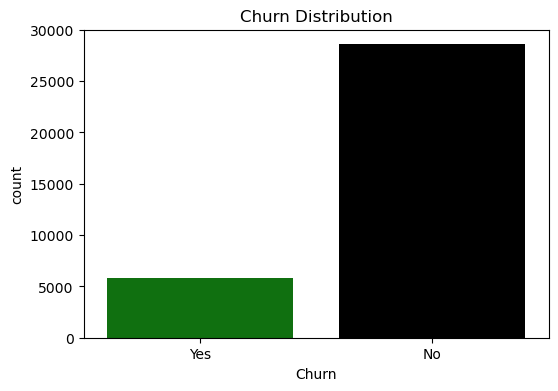

In [21]:
# Visualizing the distribution of the target variable "Churn"
plt.figure(figsize=(6, 4))
sns.countplot(x="Churn", data=final_merged_data,palette={"No": "black", "Yes": "green"})
plt.title("Churn Distribution")
plt.show()

/tmp/ipykernel_20/1537716794.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn_one_hot)


<Axes: ylabel='Density'>

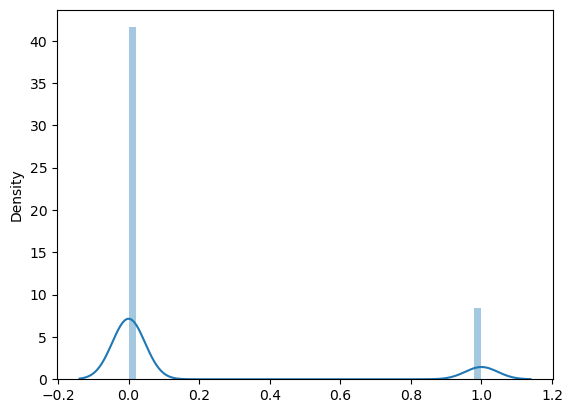

In [22]:
churn_one_hot = []
list_churn = list(final_merged_data['Churn'])
for val in list_churn:
    if val == 'Yes':
        churn_one_hot.append(1)
    else:
        churn_one_hot.append(0)
sns.distplot(churn_one_hot)

# We can see that the dataset is imbalanced with more customers not being churned 

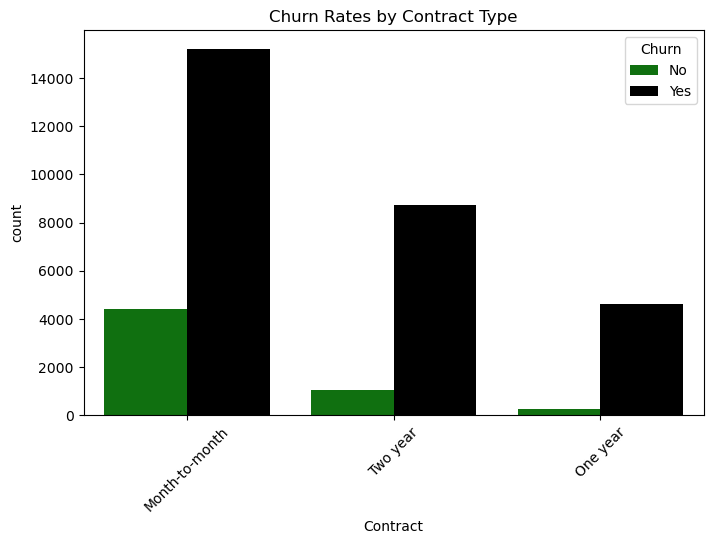

In [23]:
# Explore churn rates based on contract type
plt.figure(figsize=(8, 5))
sns.countplot(x="Contract", hue="Churn", data=final_merged_data , palette={"No": "black", "Yes": "green"})
plt.title("Churn Rates by Contract Type")
plt.xticks(rotation=45)
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

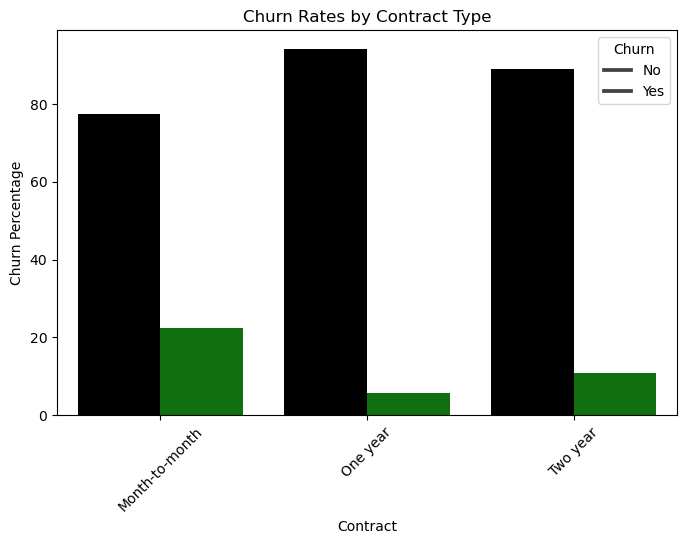

In [24]:
# Calculate churn percentages for each contract type
contract_churn_percentages = final_merged_data.groupby(["Contract", "Churn"]).size()*100 / final_merged_data.groupby("Contract").size()
contract_churn_percentages = contract_churn_percentages.reset_index(name="Percentage")

plt.figure(figsize=(8, 5))
sns.barplot(x="Contract", y="Percentage", hue="Churn", data=contract_churn_percentages,palette={"No": "black", "Yes": "green"})
plt.title("Churn Rates by Contract Type")
plt.xticks(rotation=45)
plt.ylabel("Churn Percentage")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

# We can see that the users are significantly more probable to churn out while taking monthly subscription compared to the two year and one year subscriptions

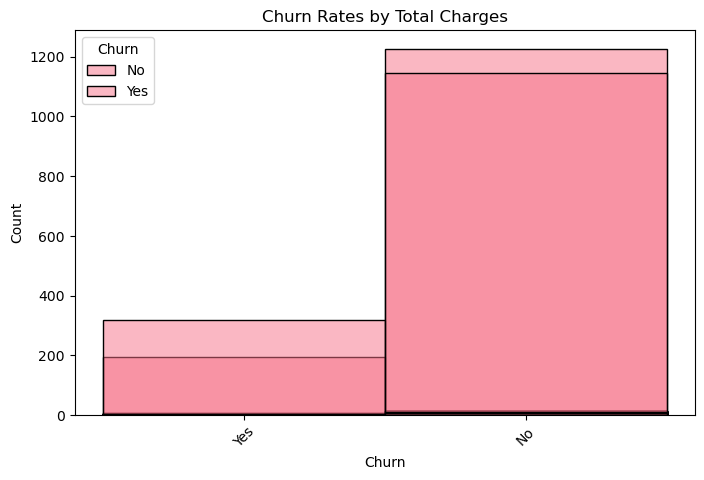

In [25]:
# Explore churn rates based on contract type
plt.figure(figsize=(8, 5))
sns.histplot(x="Churn", hue="TotalCharges", data=final_merged_data)
plt.title("Churn Rates by Total Charges")
plt.xticks(rotation=45)
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

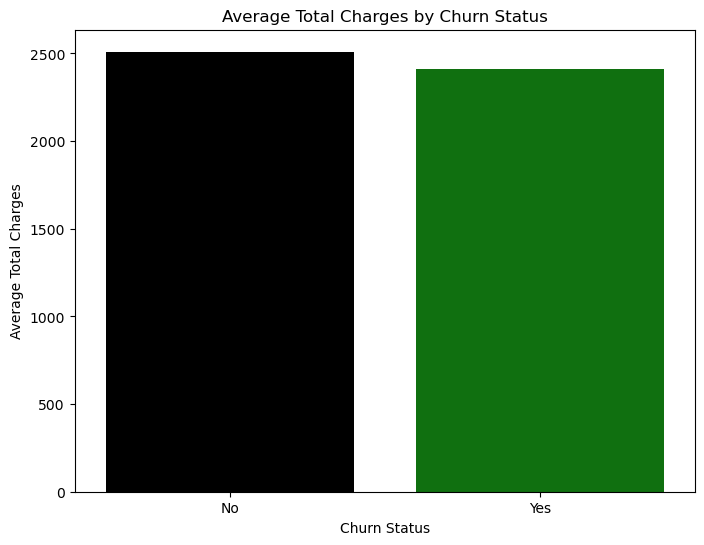

In [26]:
# Convert "TotalCharges" to numeric (ignore errors, converting non-numeric values to NaN)
final_merged_data["TotalCharges"] = pd.to_numeric(final_merged_data["TotalCharges"], errors="coerce")

# Calculate the mean "TotalCharges" for each churn status
mean_total_charges_by_churn = final_merged_data.groupby("Churn")["TotalCharges"].mean()

# Create a bar plot to visualize the relationship between "TotalCharges" and "Churn"
plt.figure(figsize=(8, 6))
sns.barplot(x=mean_total_charges_by_churn.index, y=mean_total_charges_by_churn.values,palette={"No": "black", "Yes": "green"})
plt.title("Average Total Charges by Churn Status")
plt.xlabel("Churn Status")
plt.ylabel("Average Total Charges")
plt.show()

<Axes: xlabel='Contract', ylabel='TotalCharges'>

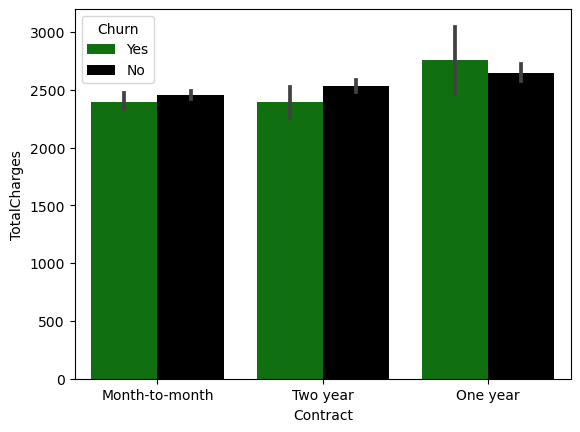

In [27]:
sns.barplot(x=final_merged_data['Contract'],y=pd.to_numeric(final_merged_data['TotalCharges']), hue=final_merged_data['Churn'],palette={"No": "black", "Yes": "green"})

 # It can be inferred that the total charges have very less influence in the churn rate.

# Service Based Ananlysis

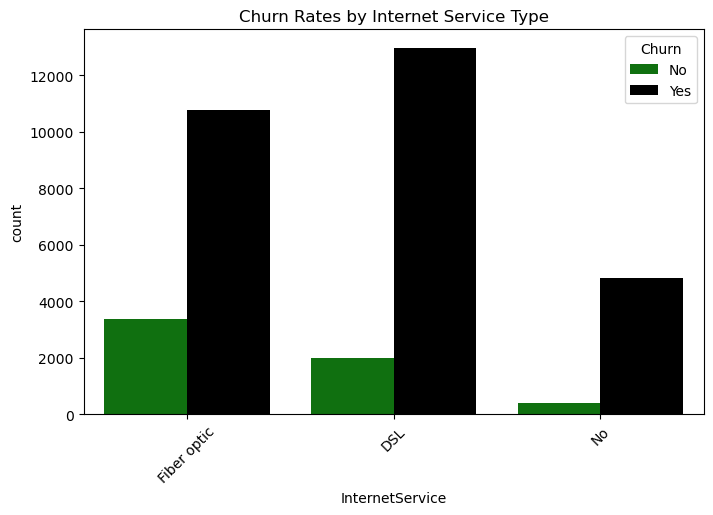

In [28]:
# Explore churn rates based on internet service type
plt.figure(figsize=(8, 5))
sns.countplot(x="InternetService", hue="Churn", data=final_merged_data,palette={"No": "black", "Yes": "green"})
plt.title("Churn Rates by Internet Service Type")
plt.xticks(rotation=45)
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

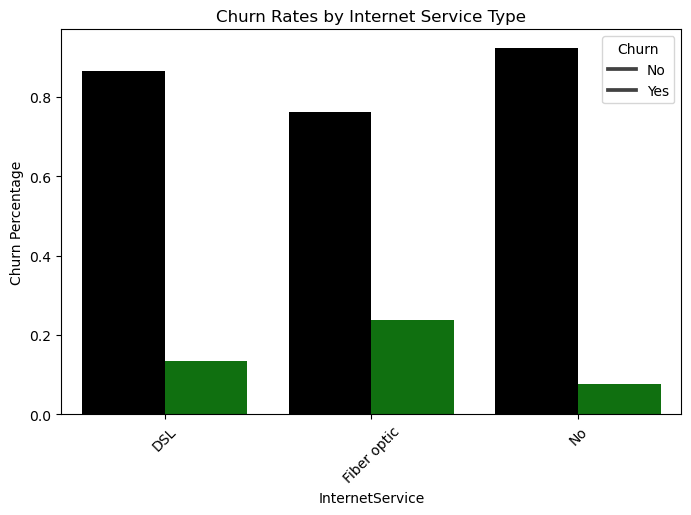

In [29]:
# Calculate churn percentages for each internet service type
internet_churn_percentages = final_merged_data.groupby(["InternetService", "Churn"]).size() / final_merged_data.groupby("InternetService").size()
internet_churn_percentages = internet_churn_percentages.reset_index(name="Percentage")

plt.figure(figsize=(8, 5))
sns.barplot(x="InternetService", y="Percentage", hue="Churn", data=internet_churn_percentages, palette={"No": "black", "Yes": "green"})
plt.title("Churn Rates by Internet Service Type")
plt.xticks(rotation=45)
plt.ylabel("Churn Percentage")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

In [30]:
internet_churn_percentages

,InternetService,Churn,Percentage
0,DSL,No,0.866413
1,DSL,Yes,0.133587
2,Fiber optic,No,0.760983
3,Fiber optic,Yes,0.239017
4,No,No,0.924080
5,No,Yes,0.075920


In [31]:
crosstab_result_int = pd.crosstab(index=internet_churn_percentages['InternetService'], columns=internet_churn_percentages['Churn'], values=internet_churn_percentages['Percentage'], aggfunc='first')
crosstab_result_int

Churn,No,Yes
InternetService,,
DSL,0.866413,0.133587
Fiber optic,0.760983,0.239017
No,0.924080,0.075920


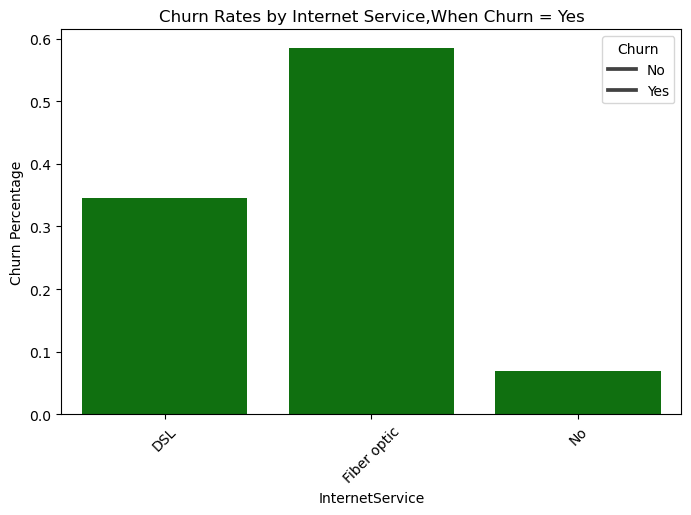

In [32]:
# Filter the data for churn = "Yes"
churn_yes_data = final_merged_data[final_merged_data["Churn"] == "Yes"]

# Calculate churn percentages for each internet service type
in_churn_percentages = churn_yes_data.groupby(["InternetService", "Churn"]).size() / len(churn_yes_data)
in_churn_percentages = in_churn_percentages.reset_index(name="Percentage")

plt.figure(figsize=(8, 5))
sns.barplot(x="InternetService", y="Percentage", hue="Churn", data=in_churn_percentages, palette={ "Yes": "green"})
plt.title("Churn Rates by Internet Service,When Churn = Yes")
plt.xticks(rotation=45)
plt.ylabel("Churn Percentage")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

In [33]:
in_churn_percentages

,InternetService,Churn,Percentage
0,DSL,Yes,0.346134
1,Fiber optic,Yes,0.585366
2,No,Yes,0.068500


# We could understand from this distribution that the customers opting for fiber optic service type are more likely to churn out

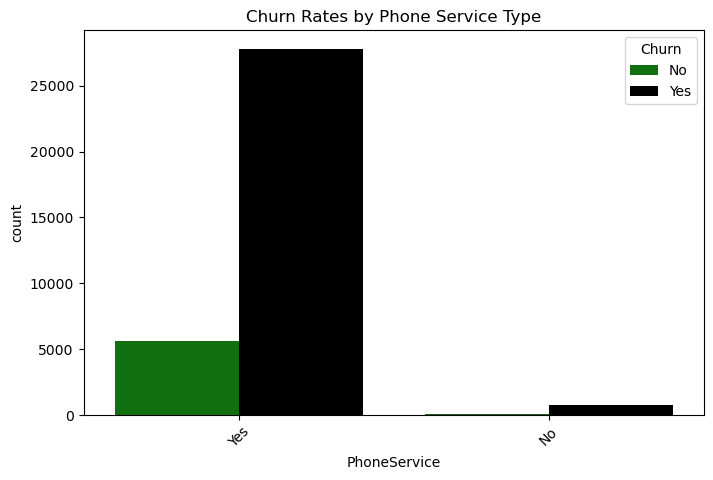

In [34]:
# Explore churn rates based on phoneservice type
plt.figure(figsize=(8, 5))
sns.countplot(x="PhoneService", hue="Churn", data=final_merged_data,palette={"No": "black", "Yes": "green"})
plt.title("Churn Rates by Phone Service Type")
plt.xticks(rotation=45)
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

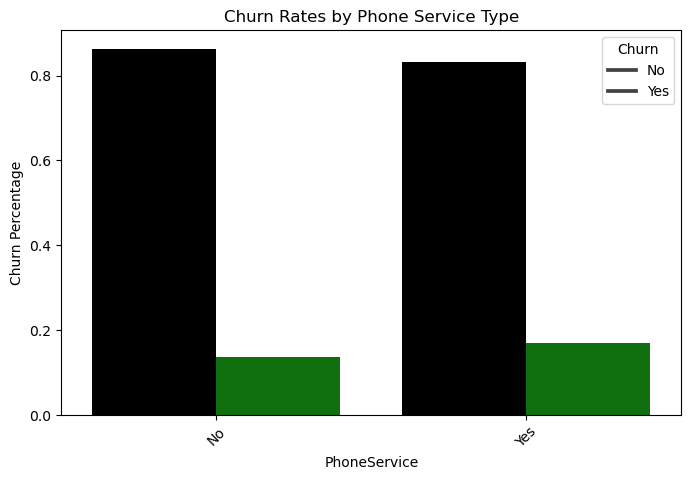

In [35]:
# Calculate churn percentages for each phone service type
phone_churn_percentages = final_merged_data.groupby(["PhoneService", "Churn"]).size() / final_merged_data.groupby("PhoneService").size()
phone_churn_percentages = phone_churn_percentages.reset_index(name="Percentage")

plt.figure(figsize=(8, 5))
sns.barplot(x="PhoneService", y="Percentage", hue="Churn", data=phone_churn_percentages, palette={"No": "black", "Yes": "green"})
plt.title("Churn Rates by Phone Service Type")
plt.xticks(rotation=45)
plt.ylabel("Churn Percentage")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

In [36]:
phone_churn_percentages

,PhoneService,Churn,Percentage
0,No,No,0.863636
1,No,Yes,0.136364
2,Yes,No,0.830879
3,Yes,Yes,0.169121


In [37]:
crosstab_result_p = pd.crosstab(index=phone_churn_percentages['PhoneService'], columns=phone_churn_percentages['Churn'], values=phone_churn_percentages['Percentage'], aggfunc='first')
crosstab_result_p

Churn,No,Yes
PhoneService,,
No,0.863636,0.136364
Yes,0.830879,0.169121


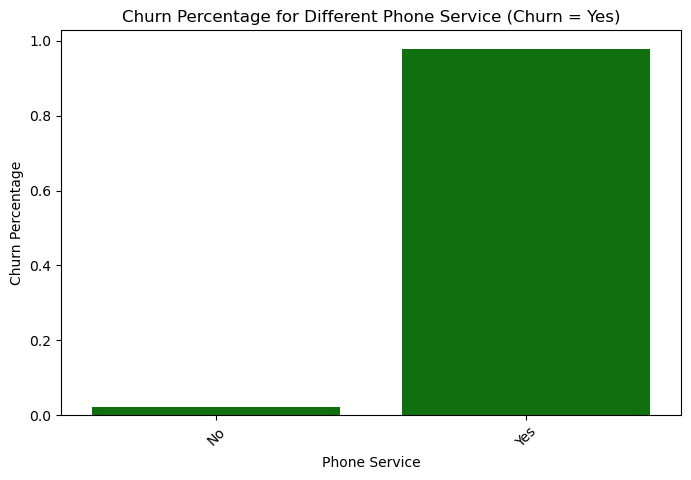

In [38]:
# Filter the data for churn = "Yes"
churn_yes_data_ps = final_merged_data[final_merged_data["Churn"] == "Yes"]

# Calculate churn percentages for each type of phone services
ps_churn_percentages1 = churn_yes_data_ps.groupby("PhoneService").size() / len(churn_yes_data_ps)
ps_churn_percentages1 = ps_churn_percentages1.reset_index(name="Percentage")

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x="PhoneService", y="Percentage", data=ps_churn_percentages1, color="green")
plt.title("Churn Percentage for Different Phone Service (Churn = Yes)")
plt.xticks(rotation=45)
plt.ylabel("Churn Percentage")
plt.xlabel("Phone Service")
plt.show()

In [39]:
ph_churn_percentages

NameError: name 'ph_churn_percentages' is not defined

# It can be inferred that when the Customer Opts for a Phone Service,then they are more likely to churn out based on the percentages

In [ ]:
# Explore churn rates based on Tech Support 
plt.figure(figsize=(8, 5))
sns.countplot(x="TechSupport", hue="Churn", data=final_merged_data,palette={"No": "black", "Yes": "green"})
plt.title("Churn Rates by Tech Support")
plt.xticks(rotation=45)
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

In [ ]:
# Calculate churn percentages for each phone service type
TechSupport_churn_percentages = final_merged_data.groupby(["TechSupport", "Churn"]).size() / final_merged_data.groupby("TechSupport").size()
TechSupport_churn_percentages = TechSupport_churn_percentages.reset_index(name="Percentage")

plt.figure(figsize=(8, 5))
sns.barplot(x="TechSupport", y="Percentage", hue="Churn", data=TechSupport_churn_percentages, palette={"No": "black", "Yes": "green"})
plt.title("Churn Rates by TechSupport")
plt.xticks(rotation=45)
plt.ylabel("Churn Percentage")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

In [ ]:
TechSupport_churn_percentages

In [ ]:
crosstab_result_ts = pd.crosstab(index=TechSupport_churn_percentages['TechSupport'], columns=TechSupport_churn_percentages['Churn'], values=TechSupport_churn_percentages['Percentage'], aggfunc='first')
crosstab_result_ts

In [ ]:
# Filter the data for churn = "Yes"
churn_yes_data_ts = final_merged_data[final_merged_data["Churn"] == "Yes"]

# Calculate churn percentages for different Tech Support 
ts_churn_percentages1 = churn_yes_data_ts.groupby("TechSupport").size() / len(churn_yes_data_ts)
ts_churn_percentages1 = ts_churn_percentages1.reset_index(name="Percentage")

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x="TechSupport", y="Percentage", data=ts_churn_percentages1, color="green")
plt.title("Churn Percentage for Different Tech Support (Churn = Yes)")
plt.xticks(rotation=45)
plt.ylabel("Churn Percentage")
plt.xlabel("Tech Support")
plt.show()

In [ ]:
ts_churn_percentages1

# It can be inferred that customers who don't opt for Tech Support are more likely to churn out

# Demographic Analysis

In [ ]:
# Analyze churn rates based on gender 
plt.figure(figsize=(8, 5))
sns.countplot(x="gender", hue="Churn", data=final_merged_data,palette={"No": "black", "Yes": "green"})
plt.title("Churn Rates by Gender")
plt.xticks(rotation=45)
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

In [ ]:
# Calculate churn percentages for each Gender
gender_churn_percentages = final_merged_data.groupby(["gender", "Churn"]).size() / final_merged_data.groupby("gender").size()
gender_churn_percentages = gender_churn_percentages.reset_index(name="Percentage")

plt.figure(figsize=(8, 5))
sns.barplot(x="gender", y="Percentage", hue="Churn", data=gender_churn_percentages, palette={"No": "black", "Yes": "green"})
plt.title("Churn Rates by gender")
plt.xticks(rotation=45)
plt.ylabel("Churn Percentage")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

In [ ]:
gender_churn_percentages

In [ ]:
crosstab_result_g = pd.crosstab(index=gender_churn_percentages['gender'], columns=gender_churn_percentages['Churn'], values=gender_churn_percentages['Percentage'], aggfunc='first')
crosstab_result_g

# There  is no significant difference between the fraction of male users churning out compared to the females

In [ ]:
# Analyze churn rates based on senior citizen status
plt.figure(figsize=(8, 5))
sns.countplot(x="SeniorCitizen", hue="Churn", data=final_merged_data,palette={"No": "black", "Yes": "green"})
plt.title("Churn Rates by SeniorCitizen")
plt.xticks(rotation=45)
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

In [ ]:
senior_citizen_churn_percentages = final_merged_data.groupby(["SeniorCitizen", "Churn"]).size() / final_merged_data.groupby("SeniorCitizen").size()
senior_citizen_churn_percentages = senior_citizen_churn_percentages.reset_index(name="Percentage")

plt.figure(figsize=(8, 5))
sns.barplot(x="SeniorCitizen", y="Percentage", hue="Churn", data=senior_citizen_churn_percentages, palette={"No": "black", "Yes": "green"})
plt.title("Average Churn Rates by Senior Citizen")
plt.xticks(rotation=45)
plt.ylabel("Churn Percentage")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

In [ ]:
senior_citizen_churn_percentages

In [ ]:
crosstab_result_sc = pd.crosstab(index=senior_citizen_churn_percentages['SeniorCitizen'], columns=senior_citizen_churn_percentages['Churn'], values=senior_citizen_churn_percentages['Percentage'], aggfunc='first')
crosstab_result_sc

In [ ]:
# Filter the data for churn = "Yes"
churn_yes_data = final_merged_data[final_merged_data["Churn"] == "Yes"]

sc_churn_percentages1 = churn_yes_data.groupby("SeniorCitizen").size() / len(churn_yes_data)
sc_churn_percentages1 = sc_churn_percentages1.reset_index(name="Percentage")

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x="SeniorCitizen", y="Percentage", data=sc_churn_percentages1, color="green")
plt.title("Churn Percentage Vs Senior Citizen (Churn = Yes)")
plt.xticks(rotation=45)
plt.ylabel("Churn Percentage")
plt.xlabel("SeniorCitizen")
plt.show()

In [ ]:
sc_churn_percentages1

# We can infer that when the customer is a senior citizen,they are more likely to churn out compared to when the customer is part of the younger population

In [ ]:
dep_citizen_churn_percentages = final_merged_data.groupby(["Dependents", "Churn"]).size() / final_merged_data.groupby("Dependents").size()
dep_citizen_churn_percentages = dep_citizen_churn_percentages.reset_index(name="Percentage")

plt.figure(figsize=(8, 5))
sns.barplot(x="Dependents", y="Percentage", hue="Churn", data=dep_citizen_churn_percentages, palette={"No": "black", "Yes": "green"})
plt.title("Average Churn Rates by Dependents")
plt.xticks(rotation=45)
plt.ylabel("Churn Percentage")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.show()

In [ ]:
dep_citizen_churn_percentages

In [ ]:
crosstab_result_sc = pd.crosstab(index=dep_citizen_churn_percentages['Dependents'], columns=senior_citizen_churn_percentages['Churn'], values=dep_citizen_churn_percentages['Percentage'], aggfunc='first')
crosstab_result_sc

In [ ]:
# Filter the data for churn = "Yes"
churn_yes_data = final_merged_data[final_merged_data["Churn"] == "Yes"]

d_churn_percentages1 = churn_yes_data.groupby("Dependents").size() / len(churn_yes_data)
d_churn_percentages1 = d_churn_percentages1.reset_index(name="Percentage")

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x="Dependents", y="Percentage", data=d_churn_percentages1, color="green")
plt.title("Churn Percentage Vs Dependents (Churn = Yes)")
plt.xticks(rotation=45)
plt.ylabel("Churn Percentage")
plt.xlabel("Dependents")
plt.show()

In [ ]:
d_churn_percentages1

# We can infer that when the customer had no dependents then he is more likely to churn out compared to those who have dependents

# Further Analysis 

In [ ]:
# Correlation heatmap for numeric variables
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges", "SeniorCitizen"]
plt.figure(figsize=(10, 8))
sns.heatmap(merged_data[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# The Numerical features also have very little correlation with each other 

In [ ]:
sns.scatterplot(x=final_merged_data['tenure'],y=final_merged_data['TotalCharges'],hue=final_merged_data['Churn'],palette={"No": "black", "Yes": "green"})

# When the Tenure is low and the Total Charges are high,more customers are expected to churn out

In [ ]:
sns.scatterplot(x=final_merged_data['tenure'],y=final_merged_data['MonthlyCharges'],hue=final_merged_data['Churn'],palette={"No": "black", "Yes": "green"})

# When the Tenure is low and the Monthly Charges are high,more customers are expected to churn out

In [ ]:
sns.scatterplot(x=final_merged_data['MonthlyCharges'],y=final_merged_data['TotalCharges'],hue=final_merged_data['Churn'],palette={"No": "black", "Yes": "green"})

# When Monthly Charges and Total Charges Increases,then the customers are more likely to churn out